In [1]:
# source: https://www.codesansar.com/numerical-methods/
#         runge-kutta-fourth-order-rk4-python-program.htm

import cmath #To help us out with the complex square root
import numpy as np #For the arrays
import matplotlib.pyplot as plt #Visualization
import os # for deleting profile and radmass files


def dedP(P):
    dP = 0.00001
    x1 = P-2*dP
    x2 = P-dP
    x3 = P+dP
    x4 = P+2*dP
    dedP = eden(x1) - 8*eden(x2) + 8*eden(x3) - eden(x4)
    dedP = dedP/(12*dP)
    return dedP

def dsdP(P,PCC):
    dP = 0.00001
    x1 = P-2*dP
    x2 = P-dP
    x3 = P+dP
    x4 = P+2*dP
    dsdP = sig(x1,PCC) - 8*sig(x2,PCC) + 8*sig(x3,PCC) - sig(x4,PCC)
    dsdP = dsdP/(12*dP)
    return dsdP


# the TOV SL equation

def b1(r,P,m,b,Lambda):
    Pcorr0 = Lambda - (1/2)*(eden(P)+P)**2 - 2*sig(P,PCC)*(eden(P)+P) 
    Pcorr = P - (KN/4)*ctilde*Pcorr0
    return (4*PI*r**3*Pcorr+MSS*m)*2*GS/(2*r*(r-2*GS*MSS*m))*2*b

def P1(r,P,m,b,Lambda):
    return -(eden(P)+P) * b1(r,P,m,b,Lambda)/(2*b) -2*sig(P,PCC)/r

def m1(r,P,m,b,Lambda):
    edencorr0 = Lambda - (3/2)*(eden(P)+P)**2 + 2*sig(P,PCC)*(eden(P)+P) 
    edencorr = eden(P) + (KN/4)*ctilde*edencorr0
    return 4*PI*r**2*edencorr/MSS

def L1(r,P,m,b,Lambda):
    sigprime = dsdP(P,PCC)*P1(r,P,m,b,Lambda)
    Lambda1 = P1(r,P,m,b,Lambda)*(eden(P)+P-2*sig(P,PCC))*(1-dedP(P))
    Lambda1 = Lambda1 + 8*sig(P,PCC)/r*(eden(P)+P-sig(P,PCC))
    Lambda1 = Lambda1 + 2*sigprime*(eden(P)+P)
    return Lambda1

In [2]:
# hasil fitting terbaru 2022-03-17

# EOS & anisotropy NS Matter based on GUP; case beta=0
def eden_beta0e0(P0): 
    if P0 > 50.000000000000 :
        FED = 254.57247440600295 + 3.2722668135019934*P0 - 0.001990248070884927*P0**2 + 1.84396271672383e-6*P0**3
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 49.26742463817125 + 39.119351704835466*P0 - 6.01896166404222*P0**2 + 0.3433694307027147*P0**3 + 0.18883140341510926*P0**4 - 0.06644121914946151*P0**5 + 0.011485498494705426*P0**6 - 0.001286305935262887*P0**7 + 0.00010130171176109097*P0**8 - 5.822797038254955e-6*P0**9 + 2.4876626925287405e-7*P0**10 - 7.949921889091221e-9*P0**11 + 1.8935665032830884e-10*P0**12 - 3.313041521451298e-12*P0**13 + 4.133738349743126e-14*P0**14 - 3.4808925256755404e-16*P0**15 + 1.772585629917586e-18*P0**16 - 4.1225826164355645e-21*P0**17
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED = 0.426006479563915 + 714.2395621878952*P0 - 4571.210848278986*P0**2 + 16153.315408751043*P0**3 - 26410.273422295842*P0**4 + 15662.08708827184*P0**5
    else :
        FED = 0.00023360915782324394 + 963.9682663375585*P0 - 6.022287440793419e6*P0**2 + 3.895919986209412e10*P0**3 - 1.2991084452361116e14*P0**4 + 2.097713931761687e17*P0**5 - 1.2971859528646892e20*P0**6
    return FED
def sig_beta0e0(P0,PCC):
    sig = 0.
    return sig

# EOS & anisotropy NS Matter based on GUP; case beta=1e-7
def eden_beta1e_7(P0): 
    if P0>50. :
        FED = 253.63165216038928 + 3.2752062368565293*P0 - 0.0020475370384748772*P0**2 + 1.9042736185326342e-6*P0**3
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 66.96708993631238 - 56.51471366592033*P0 + 80.53251468579876*P0**2 - 38.23693260439177*P0**3 + 10.427996251960504*P0**4 - 1.8375871943706583*P0**5 + 0.22236347635004453*P0**6 - 0.019184979268615673*P0**7 + 0.001208418519118079*P0**8 - 0.00005632565076844584*P0**9 + 1.952250313381669e-6*P0**10 - 5.012092090517967e-8*P0**11 + 9.3958563916334e-10*P0**12 - 1.2491366788090967e-11*P0**13 + 1.1150846246189833e-13*P0**14 - 5.992007702614946e-16*P0**15 + 1.4644428659331378e-18*P0**16
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED = 0.6596556980482822 + 658.7820465828232*P0 - 3385.41205749569*P0**2 + 8513.260609472412*P0**3 - 7598.179318111874*P0**4
    elif P0 >= 0. and P0 <= 4.99313436e-4 :
        FED = 0.00023360915782324394 + 963.9682663375585*P0 - 6.022287440793419e6*P0**2 + 3.895919986209412e10*P0**3 - 1.2991084452361116e14*P0**4 + 2.097713931761687e17*P0**5 - 1.2971859528646892e20*P0**6
    else :
        FED = 0.
    return FED
def sig_beta1e_7(P0,PCC):
    sig = 2.592491577549439 + 1.0881959659546299*P0 - 0.0067339371915666486*P0**2 + 0.00004499403194098332*P0**3 - 1.403890968893791e-7*P0**4 + 2.1380720354225518e-10*P0**5 - 1.2645243593667345e-13*P0**6
    exper = 1./((PCC/2.5)**(20))
    exper = -exper*(P0-PCC/2)**(20)
    exper = np.exp(exper)
    sig = exper*sig
    return sig

# EOS & anisotropy NS Matter based on GUP; case beta=1e-8
def eden_beta1e_8(P0): 
    if P0>50. :
        FED = 254.43269461971036 + 3.273054555571257*P0 - 0.001997209235201446*P0**2 + 1.851100232857492e-6*P0**3
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 51.10110347547388 + 29.580362175576692*P0 + 2.536105893721721*P0**2 - 3.362838524003126*P0**3 + 1.126555289123373*P0**4 - 0.21779067821540893*P0**5 + 0.027827154930995395*P0**6 - 0.00249040782957623*P0**7 + 0.00016113586173675392*P0**8 - 7.669343460675428e-6*P0**9 + 2.7037514338561945e-7*P0**10 - 7.041371129203956e-9*P0**11 + 1.3364102402868038e-10*P0**12 - 1.796203085029556e-12*P0**13 + 1.6192812130330923e-14*P0**14 - 8.779890162813716e-17*P0**15 + 2.1637251708971996e-19*P0**16
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED = 0.6596556980482822 + 658.7820465828232*P0 - 3385.41205749569*P0**2 + 8513.260609472412*P0**3 - 7598.179318111874*P0**4
    elif P0 >= 0. and P0 <= 4.99313436e-4 :
        FED = 0.00023360915782324394 + 963.9682663375585*P0 - 6.022287440793419e6*P0**2 + 3.895919986209412e10*P0**3 - 1.2991084452361116e14*P0**4 + 2.097713931761687e17*P0**5 - 1.2971859528646892e20*P0**6
    else :
        FED = 0.
    return FED
def sig_beta1e_8(P0,PCC):
    sig = 0.30701904439652133 + 0.1039495092018227*P0 - 0.0006365506206222362*P0**2 + 4.201612276546197e-6*P0**3 - 1.3005673361001568e-8*P0**4 + 1.9634090417231533e-11*P0**5 - 1.1507021099563144e-14*P0**6
    exper = 1./((PCC/2.5)**(20))
    exper = -exper*(P0-PCC/2)**(20)
    exper = np.exp(exper)
    sig = exper*sig
    return sig

# EOS & anisotropy NS Matter based on GUP; case beta=1e-9
def eden_beta1e_9(P0): 
    if P0>50. :
        FED = 254.55864437626303 + 3.272343184890175*P0 - 0.0019909310765835937*P0**2 + 1.8446607437157493e-6*P0**3
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 49.347044868847675 + 38.74310609538898*P0 - 6.020600747898559*P0**2 + 0.5480790714664272*P0**3 + 0.0671605654123523*P0**4 - 0.031129725932366903*P0**5 + 0.0051950965783228885*P0**6 - 0.0005322011739328282*P0**7 + 0.000037383109189199726*P0**8 - 1.8802057068517032e-6*P0**9 + 6.895336131346411e-8*P0**10 - 1.8494869902025548e-9*P0**11 + 3.590939846404496e-11*P0**12 - 4.913868612157229e-13*P0**13 + 4.494366268951504e-15*P0**14 - 2.4658392016208844e-17*P0**15 + 6.136484238830614e-20*P0**16
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED = 0.6596556980482822 + 658.7820465828232*P0 - 3385.41205749569*P0**2 + 8513.260609472412*P0**3 - 7598.179318111874*P0**4
    elif P0 >= 0. and P0 <= 4.99313436e-4 :
        FED = 0.00023360915782324394 + 963.9682663375585*P0 - 6.022287440793419e6*P0**2 + 3.895919986209412e10*P0**3 - 1.2991084452361116e14*P0**4 + 2.097713931761687e17*P0**5 - 1.2971859528646892e20*P0**6
    else :
        FED = 0.
    return FED
def sig_beta1e_9(P0,PCC):
    sig = 0.031145146316513446 + 0.010349211360099742*P0 - 0.00006332850044107077*P0**2 + 4.175962495200208e-7*P0**3 - 1.291925222965174e-9*P0**4 + 1.9491805101749963e-12*P0**5 - 1.1416404376861113e-15*P0**6
    exper = 1./((PCC/2.5)**(20))
    exper = -exper*(P0-PCC/2)**(20)
    exper = np.exp(exper)
    sig = exper*sig
    return sig


# EOS & anisotropy NS Matter based on GUP; case beta=2e-7
def eden_beta2e_7(P0): 
    if P0>50. :
        FED = 200.1258378961289 + 4.358685058266866*P0 - 0.013796121254205849*P0**2 + 0.00005296583197225537*P0**3 - 1.1657052492241307e-7*P0**4 + 1.3492319335389505e-10*P0**5 - 6.354991232878649e-14*P0**6
    elif P0 > 0.5658 and P0 <= 50. :
        FED = 77.61200488948319 - 103.48596798469923*P0 + 108.01042361490993*P0**2 - 47.0534406456691*P0**3 + 12.236392260418553*P0**4 - 2.091411692703887*P0**5 + 0.2477320360518246*P0**6 - 0.02103704030422168*P0**7 + 0.0013087683903057457*P0**8 - 0.00006039398028193877*P0**9 + 2.0757679240446723e-6*P0**10 - 5.290960869264037e-8*P0**11 + 9.856163079580098e-10*P0**12 - 1.3029547656969872e-11*P0**13 + 1.1571813057206772e-13*P0**14 - 6.188973993550857e-16*P0**15 + 1.5059630750270853e-18*P0**16
    elif P0 > 4.99313436e-4 and P0 <= 0.5658 :
        FED = 0.6596556980482654 + 658.7820465828245*P0 - 3385.412057495701*P0**2 + 8513.26060947245*P0**3 - 7598.179318111917*P0**4
    elif P0 >= 0. and P0 <= 4.99313436e-4 :
        FED = 0.00023360915782327885 + 963.9682663375576*P0 - 6.022287440793628e6*P0**2 + 3.8959199862096825e10*P0**3 - 1.299108445236239e14*P0**4 + 2.097713931761943e17*P0**5 - 1.297185952864878e20*P0**6
    else :
        FED = 0.
    return FED
def sig_beta2e_7(P0,PCC):
    sig = -0.019985432882369352 + 0.14583782626004813*P0 - 0.000526911770289466*P0**2 + 3.4213114681827248e-6*P0**3 - 9.611378430855598e-9*P0**4 + 1.3221650201669086e-11*P0**5 - 7.094430444329372e-15*P0**6
    exper = 1./((PCC/2.5)**(20))
    exper = -exper*(P0-PCC/2)**(20)
    exper = np.exp(exper)
    sig = exper*sig
    return sig

In [3]:
# define the Runge-Kutta 4th order for the problem
# if we want to print the profile, set profile=1
# if we not, set profile=0
def RungeKutta(rCC,bCC,LCC,PCC,MCC,h,profile):
    Perror=0
    Merror=0
    Rerror=0
    # input initial values
    r0 = rCC
    b0 = bCC
    P0 = PCC
    m0 = MCC
    L0 = LCC
    while (P0 > 0.):
        if profile == 1:
            f0 = 1-2*GS*MSS*m0/r0
            print(r0/1000, b0, P0, m0, L0/1.e+6, f0, file=open('profileSL.dat', 'a'))
        # calculate k1
        r01 = r0
        b01 = b0
        P01 = P0
        m01 = m0
        L01 = L0
        k1_b = h * b1(r01,P01,m01,b01,L01)
        k1_P = h * P1(r01,P01,m01,b01,L01)
        k1_m = h * m1(r01,P01,m01,b01,L01)
        k1_L = h * L1(r01,P01,m01,b01,L01)
        # calculate k2
        r01 = r0 + h/2
        b01 = b0 + k1_b/2
        P01 = P0 + k1_P/2
        m01 = m0 + k1_m/2
        L01 = L0 + k1_L/2
        k2_b = h * b1(r01,P01,m01,b01,L01)
        k2_P = h * P1(r01,P01,m01,b01,L01)
        k2_m = h * m1(r01,P01,m01,b01,L01)
        k2_L = h * L1(r01,P01,m01,b01,L01)
        # calculate k3
        r01 = r0 + h/2
        b01 = b0 + k2_b/2
        P01 = P0 + k2_P/2
        m01 = m0 + k2_m/2
        L01 = L0 + k2_L/2
        k3_b = h * b1(r01,P01,m01,b01,L01)
        k3_P = h * P1(r01,P01,m01,b01,L01)
        k3_m = h * m1(r01,P01,m01,b01,L01)
        k3_L = h * L1(r01,P01,m01,b01,L01)
        # calculate k4
        r01 = r0 + h
        b01 = b0 + k3_b
        P01 = P0 + k3_P
        m01 = m0 + k3_m
        L01 = L0 + k3_L
        k4_b = h * b1(r01,P01,m01,b01,L01)
        k4_P = h * P1(r01,P01,m01,b01,L01)
        k4_m = h * m1(r01,P01,m01,b01,L01)
        k4_L = h * L1(r01,P01,m01,b01,L01)
        # calculate the next r0, P0, m0, and b0
        r0 = r0 + h
        b0 = b0 + (k1_b+2*k2_b+2*k3_b+k4_b)/6
        P0 = P0 + (k1_P+2*k2_P+2*k3_P+k4_P)/6
        m0 = m0 + (k1_m+2*k2_m+2*k3_m+k4_m)/6
        L0 = L0 + (k1_L+2*k2_L+2*k3_L+k4_L)/6
        f0 = 1-2*GS*MSS*m0/r0
        # print(P0)
        if P0 >1.001*PCC:
            print(PCC,": P naik")
            Perror = 1
            break
        elif m0<0:
            print(PCC,": m negatif")
            Merror = 1
            break
        elif r0>1.e5:
            print(PCC,": r > 1.e5 meter")
            Rerror = 1
            break
    yg_error = Perror+Merror+Rerror
    if yg_error>0:
        yg_error = yg_error + 0
    elif profile == 1 and yg_error < 1:
        f0 = 1-2*GS*MSS*m0/r0
        print(r0/1000, b0, P0, m0, L0/1.e+6, f0, file=open('profileSL.dat', 'a'))
    # the results at the surface
    output = np.array([r0,b0,P0,m0,L0,f0,yg_error])
    return output


# define for a single PCC
def single_PCC(x,radmassdata,profile):
    # define initial parameters
    rCC = 1.*10**(-12) # radius near center in m--the starting point
    rmax = 100000. # radius at far distances in m
    PCC = x # pressure at the center in MeV / fm^3
    MCC = (4*PI/3)*eden(PCC)*rCC**3/MSS # Mass at the center in MeV m^3 / fm^3
    bCC = 1-2*GS*MSS*MCC/rCC # metric function b(r) at the center
    LCC = 1.*10**(-12) # (PCC+eden(PCC))**2/2. # Lambda function at center

    h = 10. # h-step

    # calculate the surface values
    output=RungeKutta(rCC,bCC,LCC,PCC,MCC,h,0)
    yg_error=output[6]
    # print(output)

    # at the surface, b = 1-2Gm/r, which is different to the result
    rSurface=output[0]
    bSurface=output[1]
    mSurface=output[3]
    bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface

    # So, we redefine bCC as follows
    bCorrection=bSurfaceTarget/bSurface
    # print("cek bCC ",abs(bCorrection-1))

    # if abs(LSurface) not near 0, then recalculate
    LSurface=output[4]
    # print(PCC, rSurface, mSurface, GS*MSS*mSurface/rSurface, bCorrection, LSurface)

    # # if abs(bCorrection) not near 1, then recalculate --- works only for the case of non-piecewise EOS
    # while (abs(bCorrection-1)>10**(-3)):
    #     while (abs(LSurface)>10**(3)):
    #         print("abs(LSurface)>10**(3)",bCorrection,LSurface)
    #         if ctilde==0:
    #             break
    #         LCC = LCC - LSurface
    #         output=RungeKutta(rCC,bCC,LCC,PCC,MCC,h,0)
    #         LSurface=output[4]
    #         # print("cek LCC ",(LSurface))
    #         # print(output)
    #     print("abs(bCorrection-1)>10**(-3)",bCorrection,LSurface)
    #     bCC=bCC*bCorrection
    #     output=RungeKutta(rCC,bCC,LCC,PCC,MCC,h,0)
    #     rSurface=output[0]
    #     bSurface=output[1]
    #     mSurface=output[3]
    #     bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
    #     bCorrection=bSurfaceTarget/bSurface

    n = 0
    maxloop = 20
    # first correction
    rSurface=output[0]
    bSurface=output[1]
    mSurface=output[3]
    LSurface=output[4]
    bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
    bCorrection=bSurfaceTarget/bSurface
    if abs(LSurface)>10**(3) or abs(bCorrection-1)>10**(-3) :
        while (abs(bCorrection-1)>10**(-3)):
            while (abs(LSurface)>10**(3)):
                # print("abs(LSurface)>10**(3)",bCorrection,LSurface)
                if ctilde==0:
                    break
                LCC = LCC - LSurface
                if n >= maxloop:
                    break
                else:
                    n = n + 1
                output=RungeKutta(rCC,bCC,LCC,PCC,MCC,h,0)
                yg_error=output[6]
                LSurface=output[4]
                # print("cek LCC ",(LSurface))
                # print(output)
            # print("abs(bCorrection-1)>10**(-3)",bCorrection,LSurface)
            bCC=bCC*bCorrection
            if n >= maxloop:
                break
            else:
                n = n + 1
            output=RungeKutta(rCC,bCC,LCC,PCC,MCC,h,0)
            yg_error=output[6]
            rSurface=output[0]
            bSurface=output[1]
            mSurface=output[3]
            bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
            bCorrection=bSurfaceTarget/bSurface
    elif yg_error>0:
        yg_error = yg_error + 0
        # do nothing

    # double correction
    yg_error=output[6]
    rSurface=output[0]
    bSurface=output[1]
    mSurface=output[3]
    LSurface=output[4]
    bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
    bCorrection=bSurfaceTarget/bSurface
    
    if abs(LSurface)>10**(3) or abs(bCorrection-1)>10**(-3) :
        while (abs(LSurface)>10**(3)):
            while (abs(bCorrection-1)>10**(-3)):
                # print("abs(bCorrection-1)>10**(-3)",bCorrection,LSurface)
                bCC=bCC*bCorrection
                if n >= maxloop:
                    break
                else:
                    n = n + 1
                output=RungeKutta(rCC,bCC,LCC,PCC,MCC,h,0)
                yg_error=output[6]
                rSurface=output[0]
                bSurface=output[1]
                mSurface=output[3]
                bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
                bCorrection=bSurfaceTarget/bSurface
            # print("abs(LSurface)>10**(3)",bCorrection,LSurface)
            if ctilde==0:
                break
            LCC = LCC - LSurface
            if n >= maxloop:
                break
            else:
                n = n + 1
            output=RungeKutta(rCC,bCC,LCC,PCC,MCC,h,0)
            LSurface=output[4]
            # print("cek LCC ",(LSurface))
            # print(output)
    elif yg_error>0:
        yg_error = yg_error + 0
        # do nothing
            
    # print the results
    rSurface=output[0]
    bSurface=output[1]
    mSurface=output[3]
    bSurfaceTarget = 1-2*GS*MSS*mSurface/rSurface
    bCorrection=bSurfaceTarget/bSurface
    LSurface=output[4]
    print(PCC, rSurface, mSurface, GS*MSS*mSurface/rSurface, bCorrection, LSurface, 0.5*np.log(bCC), LCC/1.e+6 )

    
    if n < maxloop:
        if profile == 1 and yg_error < 1:
            output=RungeKutta(rCC,bCC,LCC,PCC,MCC,h,profile)
            # print(output)
        if radmassdata == 1 and yg_error < 1:
            print(PCC, (eden(PCC)/1000), (rSurface/1000), mSurface, 
                2*GS*MSS*mSurface/rSurface, LCC/1.e+6, 0.5*np.log(bCC),
                file=open('radmassSL.dat', 'a'))
    elif n>= maxloop:
        print("looping longer than ",maxloop," for PCC = ",PCC)
    elif yg_error>0:
        yg_error = yg_error + 0
        # do nothing

    # print(PCC, (eden(PCC)/1000), (rSurface/1000), mSurface, 
    #         2*GS*MSS*mSurface/rSurface, LCC/1.e+6, 0.5*np.log(bCC) )

    output2=np.array([PCC, (eden(PCC)/1000), (rSurface/1000), mSurface, GS*MSS*mSurface/rSurface])
    return output2

In [4]:
# some constants
GS = 1.325 * 10**(-12) # Newton constant in fm^3 / MeV m^2
MSS = 1.1155 * 10**(15) # Sun's mass in MeV m^3 / fm^3
PI = np.pi 
HC = 197.327 # hc=1=197.327 MeV fm
KN = 8*PI*GS

# constants for SL model
ctilde = 1.e7 # meter^2

def eden(P0):
    return eden_beta2e_7(P0)
def sig(P0,PCC):
    return sig_beta2e_7(P0,PCC)

In [5]:
# this is only for a single PCC & and PRINT ONE PROFILE
if os.path.exists('profileSL.dat'):
    os.remove('profileSL.dat')
PCC=300
output=single_PCC(PCC,0,1)
PCC=None

300 13780.0 2.0051060023843923 0.21506689862113357 0.9999866052684692 -636.2667995732297 -0.7576623989614647 -0.6355768462465132


In [6]:
# this is for multiple PCC, ONLY RADMASS DATA
if os.path.exists('radmassSL.dat'):
    os.remove('radmassSL.dat')

for x in range(1, 5, 1):
    PCC=x
    single_PCC(PCC,1,0)
    
for x in range(5, 801, 5):
    PCC=x
    single_PCC(PCC,1,0)

1 18390.0 0.24365086723926124 0.019582660069991816 1.0004656913752443 -8.537016924130855 -0.051630660771201986 -0.0013390455231276997
2 18200.0 0.4836696579272529 0.03927922483673912 1.0000000000000004 2.200222044997603 -0.08611470778211905 -0.0026844931011896223
3 18320.0 0.5898895283492431 0.04759163994309466 0.9999999999999989 15.731604222971509 -0.10492378681692566 -0.004791651967645643
4 18290.0 0.6577406244935969 0.053152832601145686 0.9999999999999858 -8.442714496383333 -0.11906816052964794 -0.006907886914077562
5 18220.0 0.7092382351616762 0.057534616246035994 0.9999999999999851 -21.144539870941426 -0.13096337769665023 -0.008928001673061256
10 17740.0 0.8698773803432441 0.07247527556646434 0.9999999999999984 -28.04904088031245 -0.17455154645787105 -0.019151935279705958
15 17320.0 0.9778195245769613 0.08344422202984528 0.999999999999994 -30.340127734995143 -0.20783492758188352 -0.027888302889846044
20 16990.0 1.063304856035708 0.09250173344042834 1.0000000000507676 -15.876848088

<ipython-input-1-47218ba17075>:34: RuntimeWarning: overflow encountered in double_scalars
  Pcorr0 = Lambda - (1/2)*(eden(P)+P)**2 - 2*sig(P,PCC)*(eden(P)+P)
<ipython-input-2-48e5c2b5befc>:96: RuntimeWarning: overflow encountered in double_scalars
  sig = -0.019985432882369352 + 0.14583782626004813*P0 - 0.000526911770289466*P0**2 + 3.4213114681827248e-6*P0**3 - 9.611378430855598e-9*P0**4 + 1.3221650201669086e-11*P0**5 - 7.094430444329372e-15*P0**6
<ipython-input-2-48e5c2b5befc>:98: RuntimeWarning: overflow encountered in double_scalars
  exper = -exper*(P0-PCC/2)**(20)
<ipython-input-2-48e5c2b5befc>:100: RuntimeWarning: invalid value encountered in double_scalars
  sig = exper*sig
<ipython-input-1-47218ba17075>:42: RuntimeWarning: overflow encountered in double_scalars
  edencorr0 = Lambda - (3/2)*(eden(P)+P)**2 + 2*sig(P,PCC)*(eden(P)+P)


775 12960.0 2.1343391692553055 0.24341306557702067 0.9997831309469716 101.8612667928616 -1.013510941287481 -2.3768801326084565
780 12950.0 2.13537591229985 0.2437193571409953 1.0000023764472532 95.4621805503317 -1.0160332273005461 -2.349121291493745
785 12940.0 2.1364803478029484 0.24403385410091188 0.9999786588845292 454.69868597232625 -1.0184645736468516 -2.3177085732674203
790 12930.0 2.1362309784865157 0.24419408312952534 1.0001871995539446 -852.7730804982464 -1.0208159789751694 -2.28278779407123
795 12920.0 2.138363515675102 0.24462704835910512 0.9998957812718834 676.7020285216936 -1.0233539259286737 -2.2427952975696344
800 12920.0 2.1387310864281788 0.24466909815453475 0.9995926452305146 -11.13361049562878 -1.0256810139353745 -2.197607286856473


In [86]:
PCC_stop = PCC
for x in range(PCC_stop+5, 801, 5):
    PCC=x
    single_PCC(PCC,1,0)

800 : m negatif
800 10.000000000001 nan nan nan nan nan 7.676024106670703e+59


<ipython-input-1-47218ba17075>:39: RuntimeWarning: overflow encountered in double_scalars
  return -(eden(P)+P) * b1(r,P,m,b,Lambda)/(2*b) -2*sig(P,PCC)/r
<ipython-input-1-47218ba17075>:47: RuntimeWarning: invalid value encountered in double_scalars
  sigprime = dsdP(P,PCC)*P1(r,P,m,b,Lambda)
<ipython-input-14-a96f50ef5c0a>:6: RuntimeWarning: invalid value encountered in double_scalars
  FED = 254.57247440600295 + 3.2722668135019934*P0 - 0.001990248070884927*P0**2 + 1.84396271672383e-6*P0**3
<ipython-input-75-738448266f66>:230: RuntimeWarning: invalid value encountered in log
  print(PCC, rSurface, mSurface, GS*MSS*mSurface/rSurface, bCorrection, LSurface, 0.5*np.log(bCC), LCC/1.e+6 )
<ipython-input-75-738448266f66>:239: RuntimeWarning: invalid value encountered in log
  2*GS*MSS*mSurface/rSurface, LCC/1.e+6, 0.5*np.log(bCC),


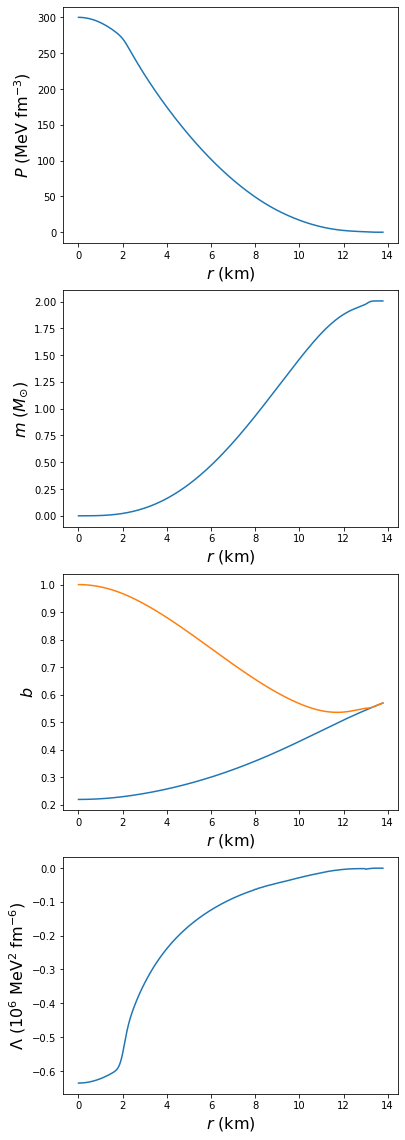

In [7]:
# plotting the profile from 1 PCC

profile=np.loadtxt("profileSL.dat")[:, :]
profr0=profile[:,0]
profb0=profile[:,1]
profP0=profile[:,2]
profm0=profile[:,3]
profL0=profile[:,4]
proff0=profile[:,5]

fig, ax = plt.subplots(4, 1, figsize = (6,20))

ax[0].plot(profr0, profP0)
ax[0].set_xlabel(r'$r$ (km)', fontsize=16)
ax[0].set_ylabel(r'$P$ (MeV fm$^{-3}$)', fontsize=16)

ax[1].plot(profr0, profm0)
ax[1].set_xlabel(r'$r$ (km)', fontsize=16)
ax[1].set_ylabel(r'$m$ ($M_{\odot}$)', fontsize=16)

ax[2].plot(profr0, profb0, profr0, proff0)
ax[2].set_xlabel(r'$r$ (km)', fontsize=16)
ax[2].set_ylabel(r'$b$', fontsize=16)

ax[3].plot(profr0, profL0)
ax[3].set_xlabel(r'$r$ (km)', fontsize=16)
ax[3].set_ylabel(r'$\Lambda$ (10$^6$ MeV$^2$ fm$^{-6}$)', fontsize=16)

plt.show()

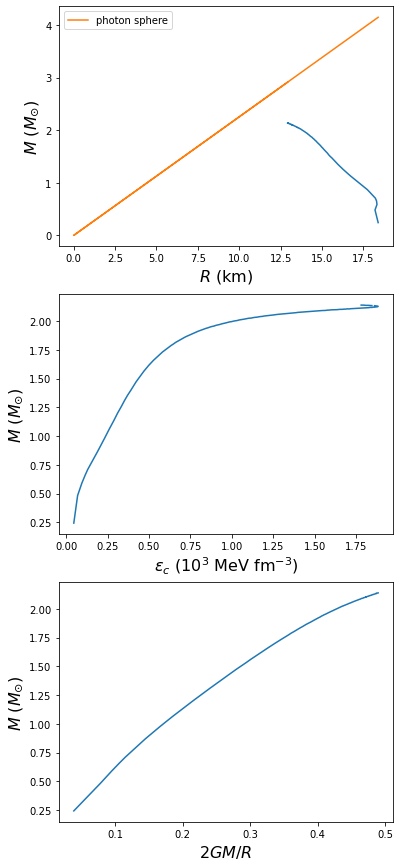

In [8]:
# plot all PCC

radmass=np.loadtxt("radmassSL.dat")[:, :]
dataEden=radmass[:,1]
dataRad=radmass[:,2]
dataMass=radmass[:,3]
dataCompactness=radmass[:,4]

fig, ax = plt.subplots(3, 1, figsize = (6,15))

x = dataRad
maxiter=len(x)-1
y = [0]*(maxiter+1)  # make arrays for photn sphere
for n in range(0, maxiter+1, 1):
    y[n] = x[n]*1.e3/(3*GS*MSS)

ax[0].plot(dataRad, dataMass)
ax[0].plot(x, y, label='photon sphere')
ax[0].set_xlabel(r'$R$ (km)', fontsize=16)
ax[0].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)
ax[0].legend()


ax[1].plot(dataEden, dataMass)
ax[1].set_xlabel(r'$\epsilon_c$ ($10^3$ MeV fm$^{-3}$)', fontsize=16)
ax[1].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

ax[2].plot(dataCompactness, dataMass)
ax[2].set_xlabel(r'$2GM/R$', fontsize=16)
ax[2].set_ylabel(r'$M$ ($M_{\odot}$)', fontsize=16)

plt.show()

In [ ]:
l = None

# effective potential outside the star in analytic form
def VeffOutside(r,mSurface,l):
    return (l*(l+1) - 6*GS*MSS*mSurface/r)*(1-2*GS*MSS*mSurface/r)/(r**2)*(GS*MSS*mSurface)**2
    
# effective potential inside the star in analytic form
def VeffInsideGR(r,mSurface,m,b,P,l):
    return (l*(l+1) - 6*GS*MSS*m/r + 4*PI*GS*r**2*( eden(P)-P ) )*b/(r**2)*(GS*MSS*mSurface)**2

def VeffInsideSL(r,mSurface,m,b,P,Lambda,l):
    corr = 2*PI*GS*ctilde*(2*Lambda - (eden(P)+P)**2)
    return (l*(l+1) - 6*GS*MSS*m/r + 4*PI*GS*r**2*( eden(P)-P + corr ) )*b/(r**2)*(GS*MSS*mSurface)**2

def rtortoise(r,m):  #definisi r tortoise
    return r + 2*GS*MSS*m*np.log( r/(2*GS*MSS*m)-1 )

In [ ]:
# this is to calculate r tortoise outside the star numerically

# r-tortoise equation outside the star
def rtorOut1(r,mSurface):
    return 1./(1-2*GS*MSS*mSurface/r)

def RungeKuttaTortoise(rmax,rtormax,mSurface,rSurface,rCC,l,profile):
    # input initial values
    h = -10.
    r0 = rmax
    rtor0 = rtormax
    while (r0 > rCC):
        if profile == 1:
            VeffOut=VeffOutside(r0,mSurface,l)
            print(r0/1000, rtor0/1000, VeffOut, VeffOut, file=open('rtorSL.dat', 'a'))
        # calculate k1
        r01 = r0
        rtor01 = rtor0
        k1_rtor = h * rtorOut1(r01,mSurface)
        # calculate k2
        r01 = r0 + h/2
        rtor01 = rtor0 + k1_rtor/2
        k2_rtor = h * rtorOut1(r01,mSurface)
        # calculate k3
        r01 = r0 + h/2
        rtor01 = rtor0 + k2_rtor/2
        k3_rtor = h * rtorOut1(r01,mSurface)
        # calculate k4
        r01 = r0 + h
        rtor01 = rtor0 + k3_rtor
        k4_rtor = h * rtorOut1(r01,mSurface)
        # calculate the next r0, P0, m0, and b0
        r0 = r0 + h
        rtor0 = rtor0 + (k1_rtor+2*k2_rtor+2*k3_rtor+k4_rtor)/6
        if r0 < rSurface: #2*GS*MSS*mSurface:
            break
    # the results at the surface
    output2 = np.array([r0,rtor0])
    return output2

In [ ]:
def integrate_inside(rtorSurface,l,profile):
    function = [0]*(maxdata+1)  # make arrays for r-tortoise equation inside the star
    for n in range(0, maxdata+1, 1):
        function[n] = 1/np.sqrt(profb0[n]*proff0[n])

    # calculate r-tortoise inside the star
    dr = (profr0[1]-profr0[0])
    for n in range(maxdata, 0, -1):
        rtorInt = rtorSurface - (dr/2)*(function[n] + 2 * sum(function[n+1:maxdata]) + function[maxdata])
        VeffInGR = VeffInsideGR(profr0[n],mSurface,profm0[n],profb0[n],profP0[n],l)
        VeffInSL = VeffInsideSL(profr0[n],mSurface,profm0[n],profb0[n],profP0[n],profL0[n],l)
        if profile == 1:
            print(profr0[n]/1000, rtorInt/1000, VeffInSL, VeffInGR, file=open('rtorSL_int.dat', 'a'))
    # the result at the center
    output3 = np.array([profr0[0],rtorInt])
    return output3

In [ ]:
profile=np.loadtxt("profileSL.dat")[:, :]
profr0=profile[:,0]*1000
profb0=profile[:,1]
profP0=profile[:,2]
profm0=profile[:,3]
profL0=profile[:,4]*1000000
proff0=profile[:,5]

maxdata=len(profr0)-1
rSurface=profr0[maxdata]
mSurface=profm0[maxdata]

In [ ]:
l=None
l=2 # input

    
# calculate r tortoise outside the star
rmax = 100.e+3  # meter
rCC = profr0[0]
rmax2 = rmax + rCC
rtormax = rtortoise(rmax2,mSurface)
print(rmax2,rtormax)
if os.path.exists('rtorSL.dat'):
    os.remove('rtorSL.dat')
output2 = RungeKuttaTortoise(rmax2,rtormax,mSurface,rSurface,rCC,l,1)
print(output2)

# calculate r tortoise inside the star
if os.path.exists('rtorSL_int.dat'):
    os.remove('rtorSL_int.dat')
rtorSurface = rtortoise(rSurface,mSurface)
print(rSurface,rtorSurface)
output3 = integrate_inside(rtorSurface,l,1)
print(output3)

In [ ]:
profile=np.loadtxt("rtorSL_int.dat")[:, :]
r_int=profile[:,0]
rtor_int=profile[:,1]
VeffSL_int=profile[:,2]
VeffGR_int=profile[:,3]

profile=np.loadtxt("rtorSL.dat")[:, :]
r_out=profile[:,0]
rtor_out=profile[:,1]
VeffSL_out=profile[:,2]
VeffGR_out=profile[:,3]

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (6,10))

ax[0].plot(rtor_out, r_out)
ax[0].plot(rtor_int, r_int)
ax[0].set_xlabel(r'$r_*$ (km)', fontsize=16)
ax[0].set_ylabel(r'$r$ (km)', fontsize=16)
# ax[0].set_ylim([0,150])

ax[1].plot(rtor_out, VeffGR_out)
ax[1].plot(rtor_int, VeffGR_int, label='no correction from SL')
ax[1].plot(rtor_int, VeffSL_int, '--', label='with correction')
ax[1].set_xlabel(r'$r_*$ (km)', fontsize=16)
ax[1].set_ylabel(r'$(GM)^2 V_{eff}$', fontsize=16)
ax[1].set_ylim([0.,1.])
ax[1].set_xlim([-50,125])
ax[1].legend()


plt.show()

In [ ]:
# hitung tau echo

# Import the required Python libraries
from scipy import interpolate
  
# Interpolation
temp_int = interpolate.interp1d(r_int, rtor_int)
xnew_int = np.arange(r_int[len(r_int)-1], r_int[0], 0.2)
ynew_int = temp_int(xnew_int)
  
# Interpolation
temp_out = interpolate.interp1d(r_out, rtor_out)
xnew_out = np.arange(r_out[len(r_out)-1], r_out[0], 0.2)
ynew_out = temp_out(xnew_out)
  
plt.title("1-D Interpolation")
plt.plot(xnew_int, ynew_int, '*', xnew_out, ynew_out, '-', color="green")
plt.show()

In [ ]:
# calculate tau echo

# display r tortoise at faraway, light ring, surface from exterior data, surface from interior data, and the center
print(temp_out(r_out[0]),temp_out(3*GS*MSS*mSurface/1000),temp_out(r_out[len(r_out)-1]),temp_int(r_int[0]),temp_int(r_int[len(r_int)-1]))

# tau echo rumus approx yg integrasi dari permukaan ke photon sphere saja
def tauapp(r,m):
    return 4*GS*MSS*m*abs(np.log(r/(2*GS*MSS*m)-1)) 
tauapprox= tauapp(rSurface,mSurface) 
fapprox = PI/(tauapprox)*3.e8

# tau echo rumus numerik yg integrasi dari permukaan ke photon sphere
tauecho = 2* ( temp_out(3*GS*MSS*mSurface/1000) - temp_out(r_out[len(r_out)-1]) )*1000
fecho = PI/(tauecho)*3.e8

# tau echo rumus numerik yg integrasi dari pusat ke photon sphere
tauecho_0 = 2* ( temp_out(3*GS*MSS*mSurface/1000) - temp_int(r_int[len(r_int)-1]) )*1000
fecho_0 = PI/(tauecho_0)*3.e8

print(fapprox,fecho,fecho_0)
if os.path.exists('tauechoGR.dat'):
    os.remove('tauechoGR.dat')
print(fapprox,fecho,fecho_0, file=open('tauechoGR.dat', 'a'))



In [ ]:
import numpy as np #For the arrays

epsilon = 1.e-6
GS = 1.325e-12 
MSS = 1.1155e15

apptau = GS*MSS*2.7
apptau = apptau*4*abs(np.log(epsilon))
print(apptau)
print(np.pi/apptau*3.e8)

apptau = (27*(epsilon+1)**2)/(16*np.sqrt(epsilon))*(np.arctan(np.sqrt(epsilon)) + np.arctan(3*np.sqrt(epsilon))) + (9*epsilon - 3)/4 +2*np.log((9*epsilon + 1)/4)
apptau = apptau*GS*MSS*2.7
print(apptau)
print(np.pi/apptau*3.e8)
apptau = None

print(46*2.7*10**3)
print(46*2.7*10**3*27/16)